# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should we use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


**Objective**: TikTok moderators are overwhelmed with user reports, many of which flag videos as containing claims that may violate platform guidelines. Our goal is to develop a model that can prioritize the review of such videos, especially those made that may be associated with high-risk content (e.g., misinformation or abuse).
The ultimate goal is to help TikTok manage its review process more efficiently, ensuring that potentially harmful videos are flagged faster.

We have been asked to build a model a Random Forest Classifier that predicts whether a video is a claim or an opinion using the dataset provided.

**Ethical Implications**
Below are a few of the ethical implications to consider:
- Freedom of expression: Automatically moderating content risks infringing on users' freed of expression
- Bias and discrimination: If the model is trained on bias data, it may disproportionately flag content from specific groups or topics
- Misinformation: Accurately identifying claims can be useful in mitigating the spread of misinformation
- User trust: Unexplained removals or bans can lead to perceptions of censorship or arbitrary enforcement

**Consequences of Model Errors**
- **False Negatives (Missed Claims)**: Policy violating or potentially harmful content may remain accessible, potentially causing harm to users and spreading misinformation or leading to leagal repercussions for the platform. These problems could be exacerbated by the fact that, as indicated in EDA conducted in a prior lab, claims are more engaging by an order of magnitude. Repercussions include but are not limited to:
  - _User Harm_: physical, emotional, or financial harm to users (eg false health advice or fraudulent claims might lead users to make poor decisions).
  - _Brand Damage_: brand or reputation damage could result in loss of user trust or even decreased usage
  - _Regulatory Fines or Legal Action_: legal penalties, fines, or increased regulation (e.g., under laws like GDPR or CCPA for online safety).
  - _Viral Spread_: Misinformation and harmful content often go viral more quickly than benign content.
- **False Positives (Mislabled Claims)**: Legitimate content could be removed penalizing users without cause, driving user frustration, loss of trust and potential backlash against the platform. Other issues include:
  - _Increased Workload_: slower overall moderation, but without serious consequences if the false positive rate is kept relatively low.
  - _User Frustration_: Repeatedly flagging could frustrate users, especially content creators, and lead to dissatisfaction. However, benign content that is flagged can still be quickly cleared by moderators, so the damage is relatively mitigated.
  - _Reduced Content Creation_: frequent incorrect flagging could reduce engagement or discourage content creationThis is important but typically has less immediate impact than unchecked harmful claims.

**Evaluation Metric Selection:**
Accuracy can be misleading as it treats all errors equally, but missing harmful claims poses a far greater risk than incorrectly flagging opinions. Ostensibly, if the objective is reducing the large backlog of user reports so moderators can prioritize review efforts was the only objective, precision is the metric of focus. For instance, the cost of a false positive is highlighted by the fact that the objective is on "reviewing efforts more efficiently." And by optimizing for precision, you increase the likelihood that the content the model flags is actually needs moderation. This, in turn, reduces the time moderators spend reviewing false positives, thereby efficiently utilizing limited resources -- the stated goal.

That said, claim video authors are 10x more likely to be banned and around 10x more likely to be under review. This implies there's another goal, which given the context and TikTok's policy, is likely misinformation and or hamrful content. And as stated in TikTok's Community Guidelines the Company "prohibits inaccurate, misleading, or false content that may cause significant harm to individuals or society — regardless of the poster’s intent...This includes not only physical harm, but also societal harm." Given that TikTok is more likely to ban users for making harmful or controversial claims, the implications of flagging benign content that does not require moderation (false positives) are less severe. This suggests that false negatives, where harmful claims are missed, are likely more costly than false positives. As a result, we optimize for F1 beta with a score of B > 1 (emphasizing recall) throughout this lab.

Why not F1? Focusing on the F1 score balances precision and recall equally. However, increasing precision at the expense of recall would lead to more false negatives. Further, since claims are more engaging than opinions by an order of magnitude, that would leave the Company at risk of virally spreading harmful content or misinformation.

**Conclusion:** 
For the purposes of this analysis we've used a F1 beta score of 2 (recall is 2x more important than precision). Why 2x? A thorough investigation of the exact beta is beyond the scope of this lab and would involve risk assessment, evaluation of current guardrails in place and financial analysis.  I'd suggest that more resources should be allocated to conduct analysis that attempts to calculcate the cost of a false positive vs. a false negative in order to determine the appopriate beta for F1 beta if this approach is adopted. The B > 1 and equal to 2 in this case is meant to be indicative of the above assessment of consequences of model errors -- that is False Negatives seem more costly.  

### **Task 1. Imports and data loading**

Importing packages needed to build machine learning models to achieve the goal of this project.

In [165]:
# import for hyperparameter tuning
!pip install optuna > /dev/null 2>&1
!pip install optuna-integration[sklearn] > /dev/null 2>&1
!pip install ipython-autotime optuna > /dev/null 2>&1

In [166]:
# import packages for data manipulation
import numpy as np
import pandas as pd

# import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance

# import packages for data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

# import packages for data modeling
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntDistribution, FloatDistribution

# utilities
import time
import pickle
from pprint import pprint

In [167]:
# load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [168]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [169]:
data.shape

(19382, 12)

Get the data types of the columns.

In [170]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [172]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [173]:
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [174]:
# Drop rows with missing values
data.dropna(inplace=True, axis=0)

In [175]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [176]:
# Check for duplicates
initial_shape = data.shape
data.drop_duplicates(inplace=True)
final_shape = data.shape
print(f'Duplicates removed: {initial_shape[0]-final_shape[0]}')

Duplicates removed: 0


Check for and handle outliers.

In [177]:
# identify numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numeric_cols)

# using IQR for outliers
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identifying outliers
outliers = ((data[numeric_cols] <  lower_bound) | (data[numeric_cols] > upper_bound)).sum()
print('# of outliers in each column:')
print(outliers)

# since we are only using RandomForest and XGBoost at the moment we'll keep the outliers

Numerical columns: Index(['#', 'video_id', 'video_duration_sec', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')
# of outliers in each column:
#                          0
video_id                   0
video_duration_sec         0
video_view_count           0
video_like_count        1726
video_share_count       2508
video_download_count    2450
video_comment_count     2789
dtype: int64


Check class balance.

In [178]:
# Check class balance
class_distribution = data['claim_status'].value_counts(normalize=True)
print(f'Class distribution: {class_distribution}')

Class distribution: claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64


## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [179]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['text_length'] = data['video_transcription_text'].str.len()

Calculate the average text_length for claims and opinions.

In [180]:
# Calculate the average text_length for claims and opinions
avg_length = data.groupby('claim_status')['text_length'].mean()
print(f'Average text length: {avg_length}')

Average text length: claim_status
claim      95.376978
opinion    82.722562
Name: text_length, dtype: float64


Visualize the distribution of `text_length` for claims and opinions.

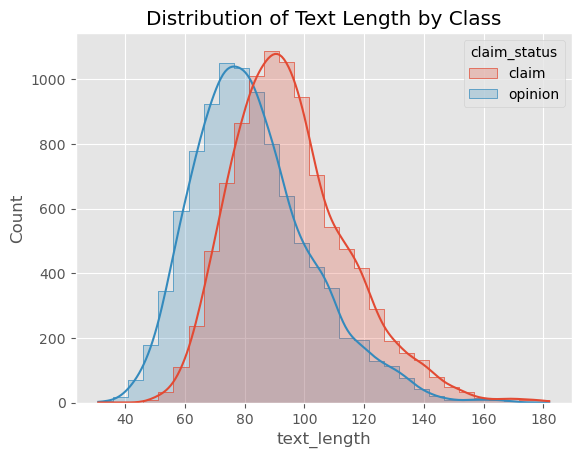

In [181]:
# Visualize the distribution of `text_length` for claims and opinions
# create two histograms in one plot
sns.histplot(data=data, x='text_length', hue='claim_status', bins=30, kde=True, element='step')
plt.title('Distribution of Text Length by Class')
plt.show()

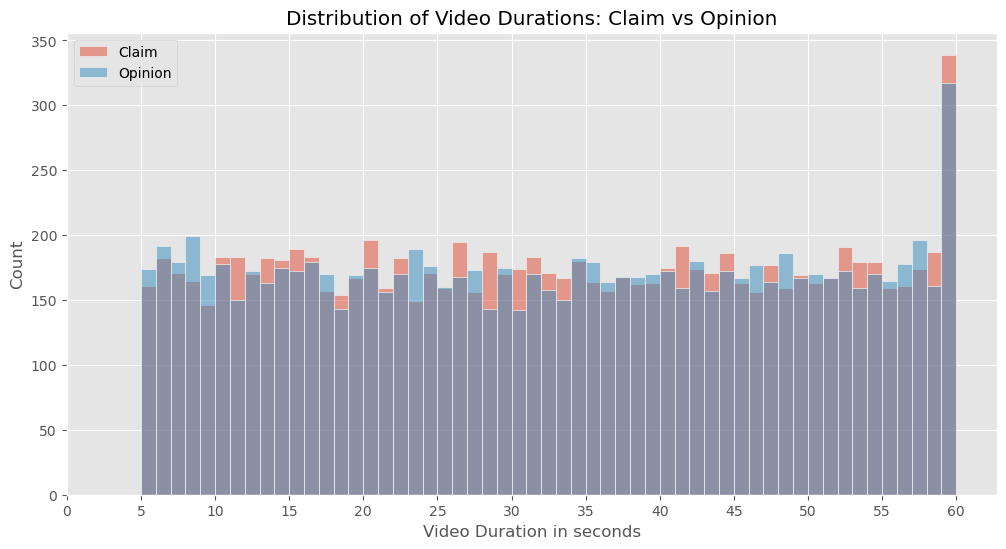

In [182]:
# Additional analysis of video duration
# segmenting data for additional EDA
claim_data = data[data['claim_status'] == 'claim'].copy()
opinion_data = data[data['claim_status'] == 'opinion'].copy()

# creating a histogram of video duration
plt.figure(figsize=(12,6))
sns.histplot(data = claim_data, x='video_duration_sec', bins=range(5,61), alpha=0.5, label='Claim')
sns.histplot(data = opinion_data, x='video_duration_sec', bins=range(5,61), alpha=0.5, label='Opinion')
plt.xlabel('Video Duration in seconds')
plt.ylabel('Count')
plt.title('Distribution of Video Durations: Claim vs Opinion')
plt.xticks(range(0, 61, 5))
plt.legend()
plt.show()

**Insight**
Given the high overlap in basic temporal features like duration and text length, we focus on alternative features such as user engagement and textual data analysis which based on [previously conducted EDA](https://github.com/WillLewis/google-advanced-data-analytics/blob/master/TikTok_ProjectLab_3_EDA.ipynb) indicate may yield better results in distinguishing between claims and opinions. 

**Feature selection and transformation**

Encode target and catgorical variables.

In [183]:
# validate target
print(data['claim_status'].unique())

# validate verified
print(data['verified_status'].unique())

['claim' 'opinion']
['not verified' 'verified']


In [184]:
# Create a copy of the X data
X = data.copy()

# Drop unnecessary columns
X = X.drop(['#', 'video_id', 'video_transcription_text'], axis=1)

# Encode target variable
X['claim_status'] = X['claim_status'].map({'claim': 1, 'opinion': 0})

# Dummy encode remaining categorical values
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)

### **Task 4: Split the data**

Assign target variable.

In [185]:
# Isolate target variable
y = X['claim_status']

Isolate the features.

In [186]:
# isolate features
X = X.drop(['claim_status'], axis=1)

# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [187]:
# Split the data into training and testing sets
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [188]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.25, stratify=y_train1, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [85]:
# Get shape of each training, validation, and testing set
print("X_train set shape:", X_train.shape)
print("X_val set shape:", X_val.shape)
print("X_test set shape:", X_test.shape)

print("y_train set shape:", y_train.shape)
print("y_val set shape:", y_val.shape)
print("y_test set shape:", y_test.shape)

X_train set shape: (11450, 10)
X_val set shape: (3817, 10)
X_test set shape: (3817, 10)
y_train set shape: (11450,)
y_val set shape: (3817,)
y_test set shape: (3817,)


### **Task 6. Build models**


### **Build a baseline random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [25]:
%%time
# instantiate the random forest classifier
rf = RandomForestClassifier(random_state=43, class_weight='balanced', oob_score=True)

# assign 2x as much importance to claims as opinions initially
f1_beta_scorer = make_scorer(fbeta_score, beta=2)


# create a revised dictionary of hyperparameters to tune
rf_params = {
    'n_estimators': [100, 125, 150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [2, 3, 4],
    'max_samples': [0.8, 0.9],
}


# Define a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'f1_beta': f1_beta_scorer}

# stratifiedkfold used to maintain class distribution in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)

# Instantiate the GridSearchCV object
gcv_rf = GridSearchCV(
    estimator=rf, 
    param_grid=rf_params,
    scoring=scoring,
    refit='f1_beta',
    cv=skf,
    n_jobs=-1
)

# fit
#gcv_rf.fit(X_train, y_train)

CPU times: user 47 µs, sys: 20 µs, total: 67 µs
Wall time: 73.2 µs


In [60]:
path = '/home/jovyan/work/'

# pickle the gcv_rf model 
with open(path + 'gcv_rf_model.pickle', 'wb') as to_write:
 #pickle.dump(gcv_rf, to_write)

In [87]:
# open pickled gcv_rf model
with open('gcv_rf_model.pickle', 'rb') as to_read:
    gcv_rf = pickle.load(to_read)

In [78]:
#print results

#print("\n" + "="*50)
print("Random Forest Model Results".center(50))
print("\n")

print(f"GCV Random Forest F1 beta score: {gcv_rf.best_score_:.4f}")

print("\nGCV Random Forest Adjusted parameters:")
pprint(gcv_rf.best_params_, width=1)

           Random Forest Model Results            


GCV Random Forest F1 beta score: 0.9918

GCV Random Forest Adjusted parameters:
{'max_depth': None,
 'max_features': 4,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 125}


## Additional Evaluation and Next Steps 
The Random Forest classification GridSearchCV score of 0.9918 is unusually high and could indicate a problem. We know that Random Forest classifiers can tend to overfit. Based on the EDA conducted in the above cells, we also know there are no duplicates and that the target classes - claim and opinion - are relatively balanced (~50.3% vs ~49.7%, respectively). So we can eliminate duplicate-driven data leakage and class imbalance (e.g. >=90% claims and <=10% opinions model could achieve >90% by simply predicting claim for everything) as reasons for the high score.   <br>  
While we want to optimize for performance to reduce moderation workload, there are ethical implications of deploying a model with near-perfect performance. For instance, if there’s a risk of the model making confident but wrong predictions in rare or edge cases, especially if it’s being used in sensitive applications like misinformation detection.
<p></p>
My initial hypothesis is the model is overfitting. we investigate with the following approaches:

| **Model Name**                                       | **Description**                                                                                                                                                                                                                       |
|:------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **6a) Feature Importance Analysis**                  | Examine feature importances from the baseline Random Forest model to identify any disproportionately influential predictors and potential data leakage.                                                                                 |
| **6b) Categorical Feature Analysis**                 | Investigate the distribution of categorical features against the target variable to detect any perfect or near perfect separations.                                                                                                     |
| **6c) Random Forest Hyperparameter Tuning**          | Iteratively adjust Random Forest hyperparameters to explore the balance between model complexity and performance, investigating the model's behavior under various configurations.                                                      |
| **6d) Optuna-based Random Forest Optimization**      | Utilize Optuna for automated, wide-range hyperparameter tuning of Random Forest, exploring the model's full potential while monitoring for overfitting.                                                                                 |
| **6e) XGBoost with Randomized Search**               | Implement XGBoost with RandomizedSearchCV to leverage its advanced regularization capabilities and compare performance against Random Forest models.                                                                                    |
| **6f) Custom ElasticNet-Like XGBoost Optimization** | Develop a custom scoring metric for XGBoost, inspired by ElasticNet regularization, to balance performance and generalization during Optuna-based hyperparameter tuning.                                                                |
| **6g) TF-IDF Based Text Classification**             | Perform TF-IDF vectorization on text data to assess the predictive power of textual features alone, providing insight into potential data peculiarities or overly simplistic patterns.                                                    |

### 6a) Feature importance analysis
**Motivation**: Examine feature importances from the baseline Random Forest model to identify any disproportionately influential predictors and potential data leakage.

**How it works**: Using the `feature_importances_` attribute of the `RandomForestClassifier` are the normalized sum of the Gini impurity reductions for each feature, averaged over all the trees in the forest. In this context, Gini impurity is a measure of how "pure" or "impure" a node in the `RandomForestClassifier`'s decision tree is, in terms of the distributing a video into the claim or an opinion class.

**Insights**: No one feature accounts for >50% of feature importance in this model. Its' unlikely any single predictor is driving data leakage. We know that there is high correlation between the features based on EDA conducted in prior labs, so there might be concern about cumulative correlation. That said, Random Forests are generally robust to highly correlated features. In fact, when tested, removing either of the correlated features as a feature engineering step increases the model prediction score 

In [66]:
# print feature importances
importances = gcv_rf.best_estimator_.feature_importances_
feature_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
print(feature_imp.sort_values('importance', ascending=False).head(10))

                          feature  importance
1                video_view_count    0.436019
2                video_like_count    0.307734
3               video_share_count    0.130183
4            video_download_count    0.085062
5             video_comment_count    0.034514
6                     text_length    0.003597
0              video_duration_sec    0.001589
8        author_ban_status_banned    0.000977
9  author_ban_status_under review    0.000300
7        verified_status_verified    0.000025


### 6b) Categorical Feature Analysis
**Motivation**: Investigate the distribution of categorical features against the target variable to detect any perfect or near perfect separations.

**How it works**:
Grouping the features by claim status and by features reveals the following imbalances in the data:
- verified_status_verified: only ~1.1% of the verifid author data are claims
- author_ban_status_banned: only ~1% of the banned authors are opinions
- author_ban_status_under_review: only ~2.4% of the under review authors are opinions

**Insights**:
While feature imbalances exist, verified and author ban status rank low interms of feature importance and don't seem extreme enough on their own to cause 99% recall, especially since none of these features perfectly separate the classes.

In [67]:
# check imbalance
for col in X.columns:
    if len(X[col].unique()) == 2:
        print(f"{col}:")
        print(pd.crosstab(X[col], y))

verified_status_verified:
claim_status                 0     1
verified_status_verified            
False                     8485  9399
True                       991   209
author_ban_status_banned:
claim_status                 0     1
author_ban_status_banned            
False                     9280  8169
True                       196  1439
author_ban_status_under review:
claim_status                       0     1
author_ban_status_under review            
False                           9013  8005
True                             463  1603


- verified_status_verified: only ~1.1% of the verifid author data are claims
- author_ban_status_banned: only ~1% of the banned authors are opinions
- author_ban_status_under_review: only ~2.4% of the under review authors are opinions


While feature imbalances exist, verified and author ban status rank low interms of feature importance and don't seem extreme enough on their own to cause 99% recall, especially since none of these features perfectly separate the classes.


### 6c) Random Forest Hyperparameter Tuning 
**Motivation**: After a few iterations (not shown) I've taken a warm start and tuned the below hyperparameters with the goal of model simplification. The below parameter ditionary aims to maintain the generalization improvements achieved while still allowing for some exploration. The end goal being striking a balance between model computational efficiency, performance and generalizability:

**How it works**:
- `n_estimators`: Slightly expanded range to allow for potentially better ensemble learning without excessive computation.
- `max_depth`: Removed 'None' to prevent overly complex trees that might overfit. Kept reasonable depths for interpretability and generalization.
- `min_samples_split`: Drastically increased to ensure splits are based on substantial data, reducing the chance of fitting to noise.
- `min_samples_leaf`: Significantly increased to ensure each leaf represents a meaningful pattern, not just a few data points.
- `max_features`: Slightly reduced range, considering the total feature count is only 10. This may help maintain diversity in trees without overfitting.
- `max_samples`: Lowered to introduce more randomness in bootstrap samples, which can improve the ensemble's ability to generalize.
- `ccp_alpha`: Added to implement cost-complexity pruning, which can help reduce overfitting by pruning less important nodes.

**Insights**
While achieving a lower f1beta score of 0.969 might be a sign of reduced likelihood of overfitting and increased generalization its not clear this is optimal as its a manual approach to tuning hyperparameters and may reduce performance suboptimally. It is however, an indicator, the hyperparameters (`ccp_alpha` drove the most impact here) are working 

In [ ]:
%%time
# re-run model with warm start parameters

# assign 2x as much importance to claims as opinions initially
f1_beta_scorer = make_scorer(fbeta_score, beta=2)

# instantiate the random forest classifier
rf_adjusted = RandomForestClassifier(random_state=43, class_weight='balanced', oob_score=True)

# create a revised dictionary of hyperparameters to tune
adjusted_params = {
    'n_estimators': [100, 150, 200],  # Was [100, 125, 150]
    'max_depth': [3, 4, 5],  # Was [3, 4, 5, None]
    'min_samples_split': [50, 100, 200],  # Was [2, 3, 4]
    'min_samples_leaf': [50, 100],  # Was [1, 2, 3]
    'max_features': [1, 2, 3],  # Was [2, 3, 4]
    'max_samples': [0.5, 0.6, 0.7],  # Was [0.8, 0.9]
    'ccp_alpha': [0.1, 0.15]  # New parameter
}

# define a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'f1_beta': f1_beta_scorer}

# stratifiedkfold used to maintain class distribution in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)

# instantiate the GridSearchCV object
#gcv_adjusted = GridSearchCV(
    estimator=rf_adjusted, 
    param_grid=adjusted_params,
    scoring=scoring,
    refit='f1_beta',
    cv=skf,
    n_jobs=-1
)

# fit
#gcv_adjusted.fit(X_train, y_train)

In [ ]:
path = '/home/jovyan/work/'

# pickle the gcv_adjusted model
with open(path + 'gcv_adjusted_model.pickle', 'wb') as to_write:
 #pickle.dump(gcv_adjusted, to_write)

In [45]:
# open pickled gcv_rf3 model
with open('gcv_adjusted_model.pickle', 'rb') as to_read:
    gcv_adjusted = pickle.load(to_read)

In [62]:
# print results
print("Random Forest Adjusted Model Results".center(50))
print("\n")

print(f"GCV Random Forest Adjusted F1 beta score: {gcv_adjusted.best_score_:.4f}")

print("\nGCV Random Forest Adjusted parameters:")
pprint(gcv_adjusted.best_params_, width=1)

print("\nFeature Importances:")
importances = gcv_adjusted.best_estimator_.feature_importances_
feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False).reset_index(drop=True)
print(feature_imp.to_string(index=True, float_format='{:.6f}'.format))

       Random Forest Adjusted Model Results       


GCV Random Forest Adjusted F1 beta score: 0.9690

GCV Random Forest Adjusted parameters:
{'ccp_alpha': 0.1,
 'max_depth': 5,
 'max_features': 3,
 'max_samples': 0.7,
 'min_samples_leaf': 100,
 'min_samples_split': 50,
 'n_estimators': 100}

Feature Importances:
                          Feature  Importance
0                video_view_count    0.352067
1                video_like_count    0.262000
2               video_share_count    0.170000
3            video_download_count    0.118079
4             video_comment_count    0.091658
5                     text_length    0.005092
6        author_ban_status_banned    0.001105
7              video_duration_sec    0.000000
8        verified_status_verified    0.000000
9  author_ban_status_under review    0.000000


### **6d) Optuna-based Random Forest Optimization***
**Motivation**: Build an OptunaSearchCV model to test a wider hyperparameter space systematically with resource constraints.

**How it works**: Uses an automated hyperparameter optimization framework, essentially efficient sampling algorithms, to explore the hyperparameter space more thoroughly than `GridSearchCV`. This model allows me to definee a broader hyperparameter search space, given computational resource constraints, including n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, max_samples, and ccp_alpha. 100 trials are conducted to explore the hyperparameter space efficiently.

**Insights**: The Optuna-tuned Random Forest achieved an F1-beta score of 0.9911, which is higher than the manually tuned version but still close to the baseline model. This suggests that even with a more exhaustive hyperparameter search, the model's performance remains exceptionally high, further indicating that the issue may not be related to model tuning but rather to the inherent characteristics of the dataset.

In [ ]:
# suppress Optuna's ExperimentalWarning and logging
import warnings 
warnings.filterwarnings("ignore", category=optuna.exceptions.ExperimentalWarning)
optuna.logging.set_verbosity(optuna.logging.WARNING) 

# instantiate f1
f1_beta_scorer = make_scorer(fbeta_score, beta=2)

# create hyperparameter search space
param_distributions = {
    'n_estimators': IntDistribution(low=100, high=200, step=1),
    'max_depth': IntDistribution(low=3, high=5, step=1),
    'min_samples_split': IntDistribution(low=20, high=200, step=1),
    'min_samples_leaf': IntDistribution(low=20, high=100, step=1),
    'max_features': IntDistribution(low=1, high=3, step=1),
    'max_samples': FloatDistribution(low=0.5, high=0.9),
    'ccp_alpha': FloatDistribution(low=0.01, high=0.4)
}

# initialize the random forest classifier
rf_opt = RandomForestClassifier(
    random_state=43,
    class_weight='balanced',
    oob_score=True
)

# set up StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)

# set up OptunaSearchCV
#optuna_search = OptunaSearchCV(
    estimator=rf_opt,
    param_distributions=param_distributions,
    cv=skf,
    scoring=f1_beta_scorer,
    n_jobs=-1,
    n_trials=100,  
    random_state=43
)

# fit the model
start_time = time.time()
#optuna_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime: {total_time / 60:.2f} minutes")

In [ ]:
path = '/home/jovyan/work/'

# pickle the optuna model
with open(path + 'cv_optuna_search.pickle', 'wb') as to_write:
 #pickle.dump(optuna_search, to_write)

In [46]:
# open pickled optuna model
with open('cv_optuna_search.pickle', 'rb') as to_read:
    cv_optuna_search = pickle.load(to_read)

In [64]:
# print results
print("Random Forest Optuna Model Results".center(50))
print("\n")

# best F1 Beta Score
print(f"Optuna Random Forest Optuna F1 beta score: {cv_optuna_search.best_score_:.4f}")

# best Parameters
print("\nOptuna Random Forest Optuna parameters:")
from pprint import pprint  # Import pprint if not already imported
pprint(cv_optuna_search.best_params_, width=1)

# feature importances
print("\nFeature Importances:")
importances = cv_optuna_search.best_estimator_.feature_importances_
feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False).reset_index(drop=True)
print(feature_imp.to_string(index=True, float_format='{:.6f}'.format))

        Random Forest Optuna Model Results        


Optuna Random Forest Optuna F1 beta score: 0.9911

Optuna Random Forest Optuna parameters:
{'ccp_alpha': 0.024813090910358365,
 'max_depth': 5,
 'max_features': 3,
 'max_samples': 0.5460874041770365,
 'min_samples_leaf': 48,
 'min_samples_split': 163,
 'n_estimators': 100}

Feature Importances:
                          Feature  Importance
0                video_view_count    0.387156
1                video_like_count    0.265859
2               video_share_count    0.156341
3            video_download_count    0.110413
4             video_comment_count    0.074460
5                     text_length    0.004515
6        author_ban_status_banned    0.001255
7              video_duration_sec    0.000000
8        verified_status_verified    0.000000
9  author_ban_status_under review    0.000000


### **6e) XGBoost with Randomized Search**
**Motivation**: 
Implement XGBoost with RandomizedSearchCV to leverage its advanced regularization capabilities and compare performance against Random Forest models.

**How it works**: uses `XGBoost` a gradient boosting framework for performance, speed, and built-in regularization techniques. XGBoost's `tree_method='hist'` attribute is used for faster training. `RandomizedSearchCV` is then used  to efficiently sample from a broad distribution of hyperparameters. These hyperparameters allow for fine-tuning of model complexity and regularization, addressing potential overfitting issues.

**Insights**: The `XGBoost` model with `RandomizedSearchCV` achieved an F1-beta score of 0.9907, which is very close to the performance of the Random Forest models. This consistency across different model types (Random Forest and XGBoost) and different optimization strategies (GridSearchCV, OptunaSearchCV, RandomizedSearchCV) seem to indicate that the high performance is likely due to characteristics of the dataset rather than model selection or tuning. 

**Note**: this is marks a change from our hypothesis that the models were overfitting.

In [ ]:
#from joblib import parallel_backend # used to address parallelism/threading issues

# instantiate the XGBoost classifier
#xgb = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    tree_method='hist',  
    n_jobs=1 
)

f1_beta_scorer = make_scorer(fbeta_score, beta=2)

# create a dictionary of hyperparameters to tune
xgb_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],  
    'min_child_weight': [1, 5, 10],  
    'subsample': [0.5, 0.7, 0.9],  
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.2], # trying regularization to control partition thru min loss reduction
    'reg_alpha': [1, 10, 100], # trying L1 regularization on weights
    'reg_lambda': [0, 1, 10], # trying L2 regularization on weights
}

# define a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'f1_beta': f1_beta_scorer}

# instantiate RandomizedSearch to reduce processing time from ~27hrs to 25 mins
#xgb_rscv = RandomizedSearchCV(
    estimator=xgb,
    n_iter=100,
    param_distributions=xgb_params, 
    scoring=scoring, 
    cv=5, 
    n_jobs=-1,
    refit='f1_beta',
    verbose=0
)

# to avoid pickling issues with n_jobs other than 1 when using custom processing (eg scoring)
with parallel_backend('threading'): 
    #xgb_rscv.fit(X_train, y_train)

In [ ]:
path = '/home/jovyan/work/'

# pickle the xgb_rscv model
with open(path + 'xgb_rscv_model.pickle', 'wb') as to_write:
 #pickle.dump(xgb_rscv, to_write)

In [47]:
# open pickled xgb_rscv model
with open('xgb_rscv_model.pickle', 'rb') as to_read:
    xgb_rscv = pickle.load(to_read)

In [66]:
# print results
print("XGBoost with L1 & L2 Regression Results".center(50))
print("\n")

print(f"XGBoost with L1 & L2 regression best score: {xgb_rscv.best_score_:.4f}")

print("\nXGBoost parameters:")
pprint(xgb_rscv.best_params_, width=1)

print("\nFeature Importances:")
importances = xgb_rscv.best_estimator_.feature_importances_
feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False).reset_index(drop=True)
print(feature_imp.to_string(index=True, float_format='{:.6f}'.format))

     XGBoost with L1 & L2 Regression Results      


XGBoost with L1 & L2 regression best score: 0.9907

XGBoost parameters:
{'colsample_bytree': 0.9,
 'gamma': 0.1,
 'learning_rate': 0.3,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 1,
 'reg_lambda': 10,
 'subsample': 0.9}

Feature Importances:
                          Feature  Importance
0                video_view_count    0.548181
1                video_like_count    0.410475
2        author_ban_status_banned    0.008697
3             video_comment_count    0.008113
4                     text_length    0.005919
5            video_download_count    0.004639
6        verified_status_verified    0.004014
7               video_share_count    0.003494
8  author_ban_status_under review    0.003357
9              video_duration_sec    0.003111


### **6f) Custom ElasticNet-Inspired XGBoost Optimization**

**Motivation**: the goal create a custom scoring metric that incorporates generalization without explicitly using a separate hold-out set. The goal is to mitigate potential overfitting or underfitting within the cross-validation process itself, addressing the consistently high (>96%) predictive measures on training data.

**How it Works**<br>
a) **ElasticNet-Like Penalty based custom metric**:
- Combines the f1beta loss with a weighted combination of L1 and L2 penalties:
$$ \text{Custom Score} = \alpha \times \text{F1 Beta} + (1 - \alpha) \times (\lambda_1 \text{ L1 penalty } + \lambda_2 \text{ L2 penalty }) $$
- Here, $\alpha$ is a hyperparameter controlling the trade-off between performance and regularization, and $\lambda_1$ and $\lambda_2$ are regularization strengths.

b) **Implementation in XGBoost context**: 
- Utilizes Optuna for hyperparameter optimization, including α, λ₁, and λ₂
- Applies the custom metric during cross-validation
- Ensures consistency across folds by calculating F1 score for each fold
- Penalizes high variance in scores across folds, indicating inconsistent performance

c) **Advantages over previous approaches**: 
- Incorporates regularization directly into the scoring metric, unlike previous methods
- Allows for fine-tuning of the balance between model performance and generalization
- Provides a more nuanced approach to addressing potential overfitting within the cross-validation process itself

**Insights**: The score of 0.9916, while not showing a significant reduction, provides crucial information. The lack of improvement despite incorporating regularization into the scoring metric suggests that overfitting may not be the primary issue. This custom approach - which goes beyond traditional hyperparameter tuning - reinforces the hypothesis that the exceptionally high performance is likely due to inherent characteristics of the dataset rather than model design. The consistent high performance across various sophisticated modeling techniques points towards potential data leakage or an unrealistically simple classification task in the given dataset. This insight is key, as it shifts the focus from model optimization to critical examination of the data itself. It leads us to explore alternative approach - namely NLP analysis - to further investigate the nature of the classification task.

In [ ]:
# custom scoring function with regularization penalties
def custom_scorer_with_elastic_regularization(y_true, y_pred, alpha, lambda1, lambda2, model):
 
    fbeta = fbeta_score(y_true, y_pred, beta=2)

    # get the model weights/feature importance 
    # using 'reg_alpha' and 'reg_lambda' as proxy
    reg_alpha_penalty = model.get_xgb_params().get('alpha', 0)
    reg_lambda_penalty = model.get_xgb_params().get('lambda', 0)

    # L1 and L2 regularization penalties
    l1_penalty = reg_alpha_penalty
    l2_penalty = reg_lambda_penalty

    # elastic Net-inspired score: balance between F-beta and regularization penalties
    custom_score = alpha * fbeta + (1 - alpha) * (lambda1 * l1_penalty + lambda2 * l2_penalty)

    return custom_score

def objective(trial):
 
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'tree_method': 'hist',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 5),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 0.9),  
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),  
        'gamma': trial.suggest_float('gamma', 0, 0.2),  
        'alpha': trial.suggest_float('alpha', 0.0, 10.0),  
        'lambda': trial.suggest_float('lambda', 0.0, 10.0)  
    }
    
    # instantiate and fit XGB
    model = XGBClassifier(**param)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    y_pred = cross_val_predict(model, X_train, y_train, cv=skf)
   
    # tune α, λ₁, and λ₂ in the objective function
    alpha2 = trial.suggest_float('alpha2', 0.0, 1.0)  # trade-off between F-beta and regularization
    lambda1 = trial.suggest_float('lambda1', 0.0, 10.0)  # L1 penalty strength
    lambda2 = trial.suggest_float('lambda2', 0.0, 10.0)  # L2 penalty strength

    # calculate custom score using custom_scorer_with_regularization function
    custom_score = custom_scorer_with_elastic_regularization(y_train, y_pred, alpha2, lambda1, lambda2, model)
    
    # optuna tries to maximize the score
    return custom_score


# set up & save the study
study_name = "xgboost_elastic_net_optimization"
storage_path = '/home/jovyan/work/optuna_xgboost_elastic_net_study.db'
storage_name = f"sqlite:///{storage_path}"

study = optuna.create_study(
    study_name=study_name, 
    storage=storage_name,
    load_if_exists=True,
    direction="maximize",
    pruner=optuna.pruners.MedianPruner() # complexity reduction
)

# optimize hyperparameters
#study.optimize(objective, n_trials=30)


[I 2024-10-01 13:27:43,397] Using an existing study with name 'xgboost_elastic_net_optimization' instead of creating a new one.
[I 2024-10-01 13:47:32,418] Trial 22 finished with value: 28.370840263033937 and parameters: {'n_estimators': 149, 'max_depth': 5, 'learning_rate': 0.08320906848983567, 'min_child_weight': 5, 'subsample': 0.5935635340938787, 'colsample_bytree': 0.8303106264951439, 'gamma': 0.05318295149096543, 'alpha': 3.746269674111436, 'lambda': 6.427075227584062, 'alpha2': 0.2088294067944001, 'lambda1': 1.0468060256046445, 'lambda2': 4.928598115986006}. Best is trial 22 with value: 28.370840263033937.
[I 2024-10-01 14:09:01,428] Trial 23 finished with value: 27.815132778168824 and parameters: {'n_estimators': 153, 'max_depth': 5, 'learning_rate': 0.08525089361191568, 'min_child_weight': 5, 'subsample': 0.5034230536475663, 'colsample_bytree': 0.8417484797473148, 'gamma': 0.05366994753837043, 'alpha': 1.765155778406334, 'lambda': 6.764990105003585, 'alpha2': 0.174290761286493

In [111]:
# load the existing study
study_name = "xgboost_elastic_net_optimization"
storage_path = '/home/jovyan/work/optuna_xgboost_elastic_net_study.db'
storage_name = f"sqlite:///{storage_path}"

loaded_study = optuna.load_study(
    study_name=study_name,
    storage=storage_name
)

# set the best parameters
best_params = loaded_study.best_trial.params

# instantiate and train the model with thethe Optuna ElasticNet optimized best params
xgb_optuna_elastic = XGBClassifier(**best_params, random_state=42)

# train the XGBoost model with the Optuna ElasticNet optimized parameters
xgb_optuna_elastic.fit(X_train, y_train)

[00:04:12] WARNING: ../src/learner.cc:767: 
Parameters: { "alpha2", "lambda1", "lambda2" } are not used.



XGBClassifier(alpha=3.746269674111436, alpha2=0.2088294067944001,
              base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8303106264951439, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05318295149096543, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              lambda=6.427075227584062, lambda1=1.0468060256046445,
              lambda2=4.928598115986006, learning_rate=0.08320906848983567,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None, ...)

In [110]:
# print results
print("XGBoost Optuna ElasticNet Model Results".center(50))
print("\n")

print(f"XGBoost Optuna ElasticNet F1 beta score (training): {f1_beta_train:.4f}")

# Best Parameters
print("\nXGBoost Optuna ElasticNet parameters:")
from pprint import pprint
pprint(best_params, width=1)

# Feature importances
print("\nFeature Importances:")
importances = xgb_optuna_elastic.feature_importances_
feature_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False).reset_index(drop=True)
print(feature_imp.to_string(index=True, float_format='{:.6f}'.format))

     XGBoost Optuna ElasticNet Model Results      


XGBoost Optuna ElasticNet F1 beta score (training): 0.9916

XGBoost Optuna ElasticNet parameters:
{'alpha': 3.746269674111436,
 'alpha2': 0.2088294067944001,
 'colsample_bytree': 0.8303106264951439,
 'gamma': 0.05318295149096543,
 'lambda': 6.427075227584062,
 'lambda1': 1.0468060256046445,
 'lambda2': 4.928598115986006,
 'learning_rate': 0.08320906848983567,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 149,
 'subsample': 0.5935635340938787}

Feature Importances:
                          Feature  Importance
0                video_view_count    0.769015
1                video_like_count    0.141001
2               video_share_count    0.062026
3        author_ban_status_banned    0.006873
4            video_download_count    0.006426
5  author_ban_status_under review    0.004475
6                     text_length    0.004212
7             video_comment_count    0.003874
8              video_duration_sec    0.002098
9     

### **6g) NLP Analysis**
**Motivation**: Below we conduct a simple NLP analysis to check for obvious patterns of unrealistic data

**How it works**: The `TfidfVectorizer` transforms TikTok video transcriptions into a matrix where each row represents a transcription and each column represents a unique term weighted by its importance in the data. Average TFIDF vectors are computed for both claim and opinion videos. The `predict_tfidf` function then compares the TFIDF values of unseen test videos to these averages and assigns each video to the class whose average TFIDF vector is closer.

**Insights**:
The fact that a non-machine learning model like TFIDF scores >96% average across the featured metrics indicates that the text content alone is highly predictive of claim status and that the text data might contain obvious patterns or keywords that make classification trivial. The fact that this simple method also acheives very high accuracy supports the hypothesis that there's an inherent separability in the dataset, making the classification task unrealistically easy.

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# extract predictor and target
X_text = data['video_transcription_text']
y = data['claim_status'].apply(lambda x: 1 if x == 'claim' else 0)

# replace NaN values in 'video_transcription_text' with an empty string
X_text = X_text.fillna('')

# split the data again to reflect the changes
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, stratify=y, random_state=42)

# initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test_text).toarray()

# calculate the average TF-IDF score for each class
claim_avg = np.asarray(X_train_tfidf[y_train == 1].mean(axis=0))
opinion_avg = np.asarray(X_train_tfidf[y_train == 0].mean(axis=0))

# predict based on which class average is closer
def predict_tfidf(X):
    claim_avg_arr = np.asarray(claim_avg)
    opinion_avg_arr = np.asarray(opinion_avg)
    
    # calculate the absolute differences
    claim_diff = np.abs(X - claim_avg_arr)
    opinion_diff = np.abs(X - opinion_avg_arr)
    return (claim_diff.sum(axis=1) < opinion_diff.sum(axis=1)).astype(int)

# predict on the test set
y_pred = predict_tfidf(X_test_tfidf)

# add the fbeta score with beta=2 to the report
fbeta = fbeta_score(y_test, y_pred, beta=2, average=None, labels=[1, 0])
macro_fbeta = fbeta_score(y_test, y_pred, beta=2, average='macro')
weighted_fbeta = fbeta_score(y_test, y_pred, beta=2, average='weighted')


# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, target_names=['Claim', 'Opinion'], output_dict=True)

# insert the F-beta scores for both classes into the report
report_dict['Claim']['f1_beta_2'] = fbeta[0]
report_dict['Opinion']['f1_beta_2'] = fbeta[1]
report_dict['macro avg']['f1_beta_2'] = macro_fbeta
report_dict['weighted avg']['f1_beta_2'] = weighted_fbeta

# reorder the columns, moving 'f1_beta_2' before 'support'
cols = ['precision', 'recall', 'f1-score', 'f1_beta_2', 'support']

report_df = report_df[cols]

report_df

,precision,recall,f1-score,f1_beta_2,support
Claim,0.933038,1.00000,0.965359,0.942580,1895.00000
Opinion,1.000000,0.92924,0.963323,0.985850,1922.00000
accuracy,0.964370,0.96437,0.964370,0.964370,0.96437
macro avg,0.966519,0.96462,0.964341,0.964215,3817.00000
weighted avg,0.966756,0.96437,0.964334,0.964062,3817.00000


### Revisiting EDA

[The EDA we conducted in a previous lab](https://github.com/WillLewis/google-advanced-data-analytics/blob/master/TikTok_ProjectLab_3_EDA.ipynb) further support the issues with the data.  

**Data Separation**: The engagement metrics (views and likes) show a clear separation between claim and opinion videos. This separation is so pronounced that it makes the classification task trivially easy for machine learning models.

**Potential Real-world Discrepancy**: While it's possible that claim videos genuinely receive more engagement in real-world scenarios, the degree of separation in this dataset seems unusually high and may not represent a typical distribution.

**Overfitting Unlikely**: Given the consistent performance across different model types and validation strategies, this is unlikely to be a case of overfitting in the traditional sense. Instead, the dataset itself appears to contain features that are too predictive

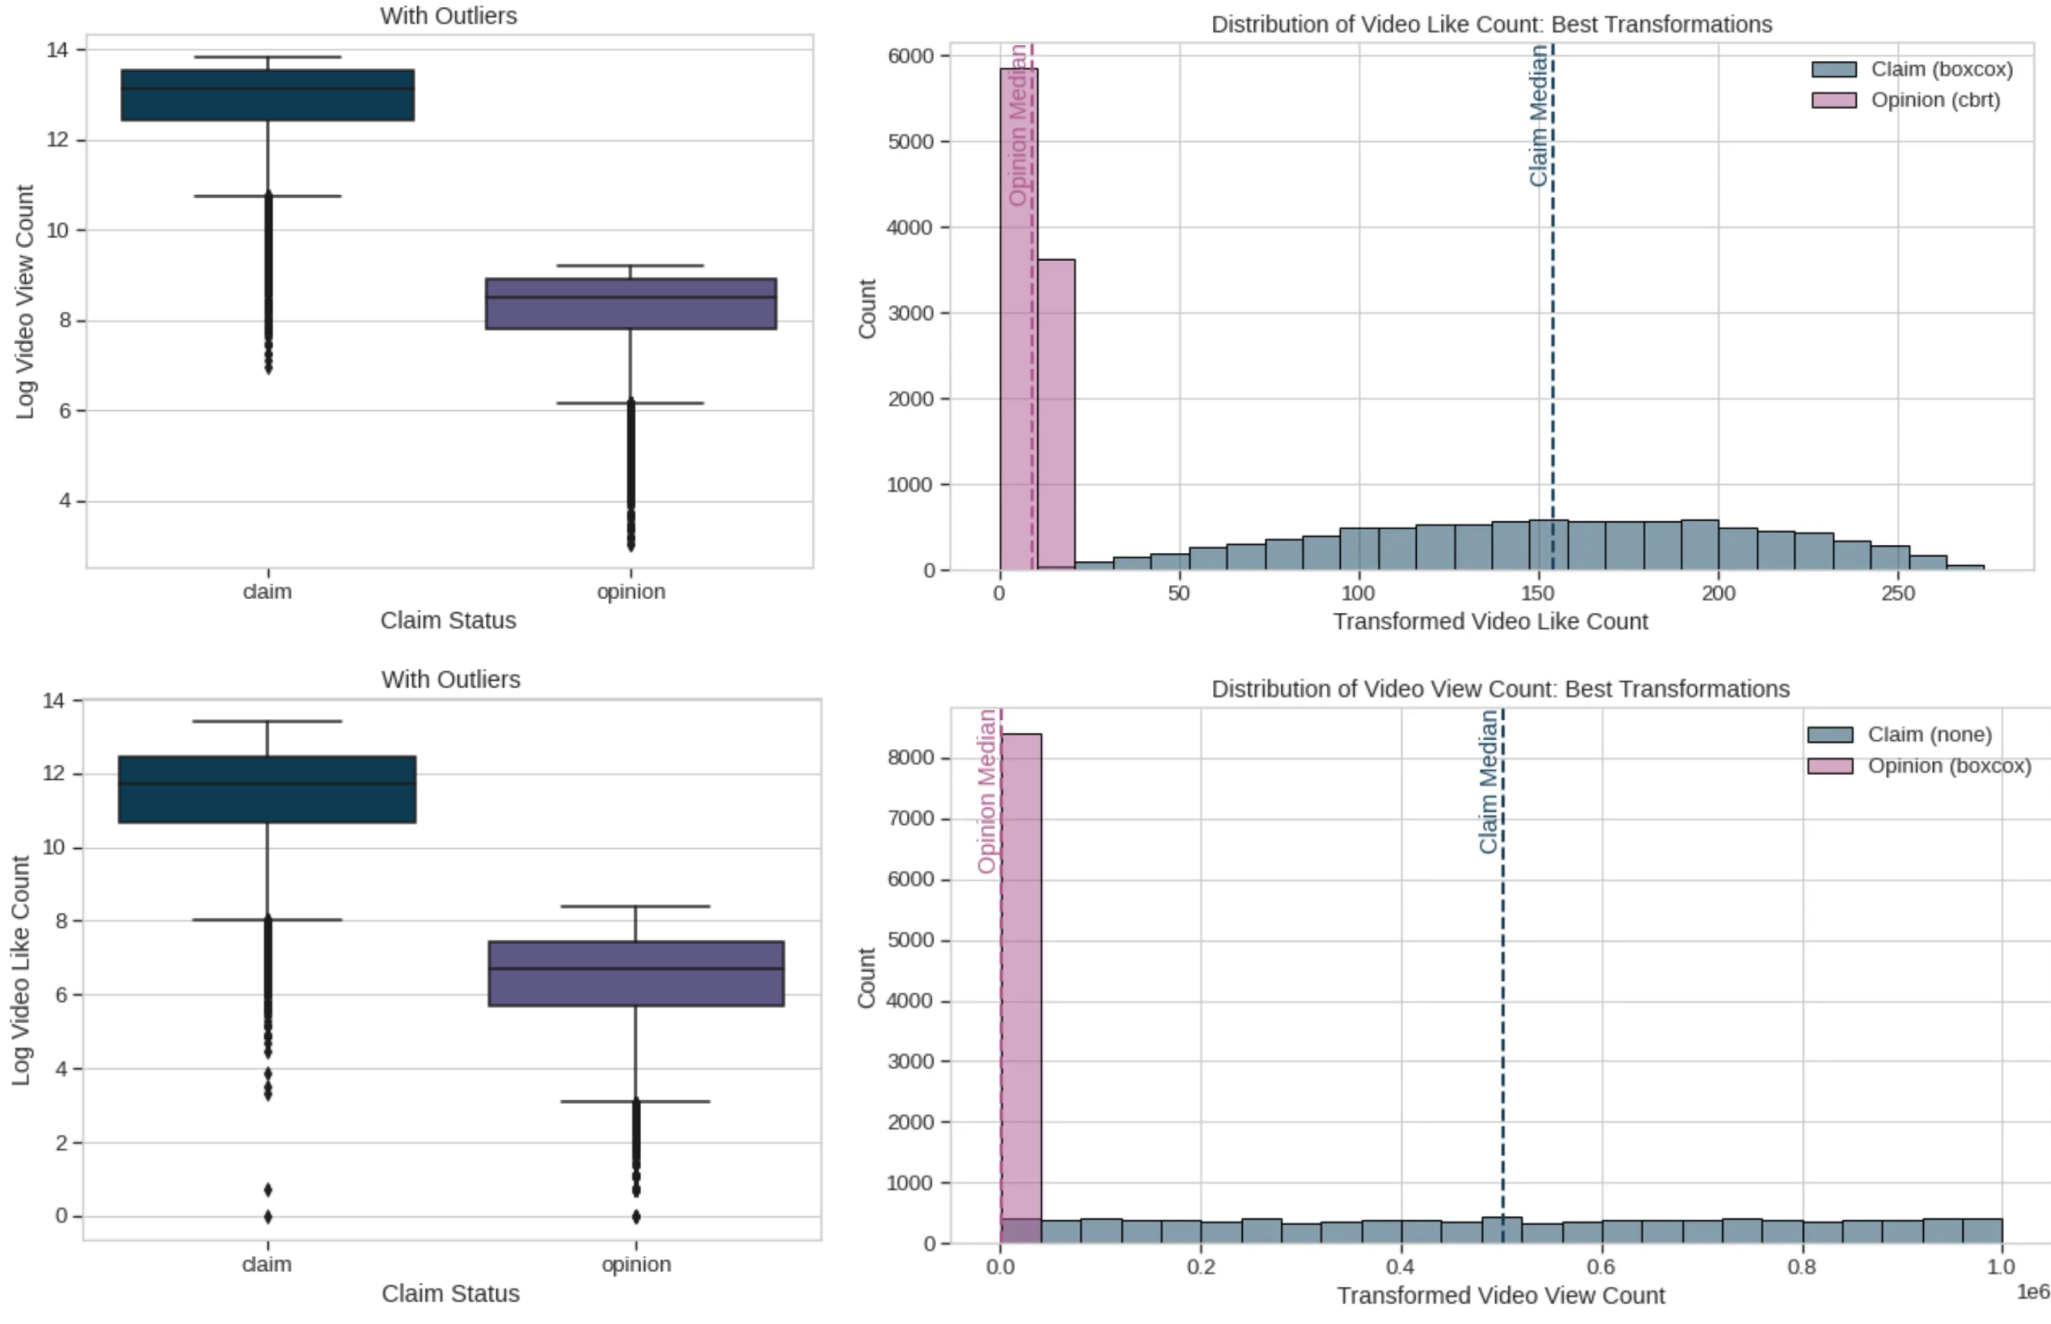

In [134]:
from IPython.display import Image

#display boxplots and histograms demonstrating the differences in distribution amongs claim and opinion video views and likes
Image(filename='Charts.png', width=1200)

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate models**

Evaluate models against validation criteria.

In [48]:
models = {
    'RandomForest_GridSearchCV': gcv_rf.best_estimator_,
    'RandomForest_Adjusted': gcv_adjusted.best_estimator_,
    'RandomForest_Optuna': cv_optuna_search.best_estimator_,
    'XGBoost_RandomizedSearchCV': xgb_rscv.best_estimator_,
    'XGBoost_Optuna_ElasticNet': xgb_optuna_elastic
}

### Predicting on validation data
**Insights**: 
The fact that all the models, including those with strong regularization, achieve >96% F1-beta scores on validation and test sets is suspicious. This further suggests the problem may be too "easy" for the models. Since we believe we have train test and split the data in a randomized and stratified its unlikely the data split is the problem. 

It is more likely that a) the features are too predictive, possibly due to some data leakage that occured upstream; and/or b) the dataset is not representative of real-world complexity. 

In fact that validation data is so simple that it appears we have the exact same scoring for RandomForest_GridSearchCV and XGBoost_Optuna_ElasticNet. This is highly unusual and suggests that both models are making exactly the same predictions on the validation set, despite being fundamentally different algorithms.

**Note: Possible Explanations for exact same scoring across XGBoost_Optuna_ElasticNet & RandomForest_GridSearchCV**:
1) Validation Set Characteristics: The validation set might contain examples that are particularly easy to classify, leading both models to achieve perfect precision and identical recall.
This could indicate that the validation set is not representative of the full complexity of the problem.

2) Feature Importance: If a small subset of features is overwhelmingly predictive, both models might rely heavily on these features, leading to identical predictions on the validation set. That said the likelihood of this is 

3) Data Leakage or Overfitting: There might be some form of data leakage that both models are exploiting in the same way for the validation set. The models might be overfitting to specific patterns in the training and validation data that don't generalize perfectly to the test set.

4) Randomness and Seed Setting: If the same random seed was used for both models during training or validation split, it could contribute to this alignment, although it wouldn't fully explain identical performance across different algorithms.

In [49]:
def evaluate_model(model, X, y):
    start_time = time.time()
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    end_time = time.time()
    
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    f1_beta = fbeta_score(y, y_pred, beta=2)
    prediction_time = end_time - start_time
    
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'F1-beta (beta=2)': f1_beta,
        'Prediction Time (s)': prediction_time
    }

results = []
for name, model in models.items():
    val_results = evaluate_model(model, X_val, y_val)
    results.append({'Model': name, **val_results})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-beta (beta=2)', ascending=False)

print(results_df.to_string(index=False))

# calculate and display average prediction time
avg_prediction_time = results_df['Prediction Time (s)'].mean()
print(f"\nAverage Prediction Time: {avg_prediction_time:.6f} seconds")

                     Model  Precision   Recall  F1-score  F1-beta (beta=2)  Prediction Time (s)
 RandomForest_GridSearchCV        1.0 0.992716  0.996345          0.994164             0.110018
 XGBoost_Optuna_ElasticNet        1.0 0.992716  0.996345          0.994164             0.384254
       RandomForest_Optuna        1.0 0.992196  0.996083          0.993747             0.056117
XGBoost_RandomizedSearchCV        1.0 0.991675  0.995820          0.993329             0.015162
     RandomForest_Adjusted        1.0 0.962019  0.980642          0.969382             0.058171

Average Prediction Time: 0.124745 seconds


### Predicting on test data
**Insights** 
Normally, we wouldn't run the models on the test data. We do here to confirm that the exact same scoring across the  RandomForest_GridSearchCV and XGBoost_Optuna_ElasticNet models on the validation data is not a referencing or random seed error. Below we can see that it isn't for the following reasons:

- **Different Performance on Test Data**:
The RandomForest_GridSearchCV and XGBoost_Optuna_ElasticNet models show different performance metrics on the test data. This clearly indicates that these are distinct models being evaluated separately.
Consistent Behavior Across Datasets:
If it were a referencing error where both entries accidentally pointed to the same model, we would expect to see identical results on both validation and test sets. The fact that we see differences in the test set rules this out.

- **Other Models Show Unique Results**:
The other models in the evaluation (RandomForest_Optuna, XGBoost_RandomizedSearchCV, RandomForest_Adjusted) all show distinct performance metrics on both validation and test sets. This further supports that each model is being correctly referenced and evaluated individually.

- **Precision of Results**:
The matching scores on the validation set are precise to six decimal places, which is consistent with genuine evaluation results rather than a duplication error.

Given these points, we can confidently say this is not a referencing or data handling error in the code. Instead, it represents a genuine and intriguing result that speaks to the nature of the dataset and the classification task at hand. This unusual alignment in performance on the validation set, coupled with divergence on the test set, is a significant finding that warrants further investigation 

In [50]:
def evaluate_model(model, X, y):
    start_time = time.time()
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    end_time = time.time()
    
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    f1_beta = fbeta_score(y, y_pred, beta=2)
    prediction_time = end_time - start_time
    
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'F1-beta (beta=2)': f1_beta,
        'Prediction Time (s)': prediction_time
    }

results = []

for name, model in models.items():
    val_results = evaluate_model(model, X_test, y_test)
    results.append({'Model': name, **val_results})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-beta (beta=2)', ascending=False)

print(results_df.to_string(index=False))

# calculate and display average prediction time
avg_prediction_time = results_df['Prediction Time (s)'].mean()
print(f"\nAverage Prediction Time: {avg_prediction_time:.6f} seconds")

                     Model  Precision   Recall  F1-score  F1-beta (beta=2)  Prediction Time (s)
 RandomForest_GridSearchCV   1.000000 0.993236  0.996607          0.994582             0.104439
 XGBoost_Optuna_ElasticNet   0.999476 0.991675  0.995560          0.993226             0.148662
       RandomForest_Optuna   1.000000 0.991155  0.995558          0.992911             0.057504
XGBoost_RandomizedSearchCV   0.999475 0.990114  0.994773          0.991972             0.015875
     RandomForest_Adjusted   1.000000 0.962019  0.980642          0.969382             0.057455

Average Prediction Time: 0.076787 seconds


### Further investigating RandomForest_GridSearchCV & XGBoost_Optuna_ElasticNet model performance mirroring

#### **RandomForest_GridSearchCV**

Display the predictions on the encoded testing set.

In [135]:
# display the predictions of the RandomForest_GridSearchCV on the encoded testing set
y_pred = gcv_rf.best_estimator_.predict(X_val)

Display the true labels of the testing set.

In [136]:
# Display the true labels of the testing set
y_pred

array([1, 1, 1, ..., 1, 1, 1])

Create a confusion matrix to visualize the results of the classification model.

In [137]:
# we create a reusable confusion matrix plotting function 
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test/validate), and y data (test /validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    
    plt.show()

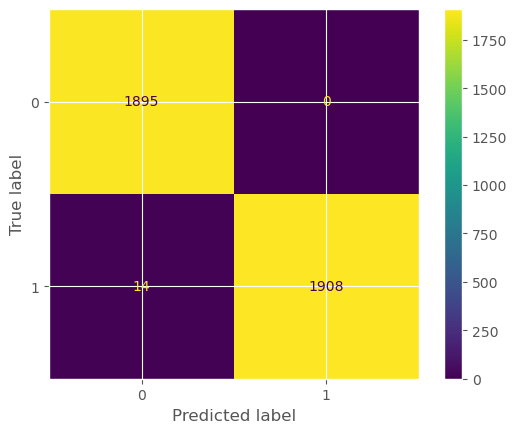

In [138]:
# insert [confusion matrix to visualize the results of the RandomForest_GridSearchCV]
conf_matrix_plot(gcv_rf, X_val, y_val)

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [104]:
# Create classification report for random forest model
target_labels=['class', 'opinion']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

       class       0.99      1.00      1.00      1895
     opinion       1.00      0.99      1.00      1922

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Insights:** The classification report shows that the RandomForest_GridSearchCV predictions are nearly perfect. The confusion matrix shows that the model only has 14 false negatives, 0 false positives, 1895 true negatives and 1908 true positives. 

#### **XGBoost_Optuna_ElasticNet**

In [139]:
# display the predictions of the XGBoost_Optuna_ElasticNet on the encoded testing set
y_pred = xgb_optuna_elastic.predict(X_val)

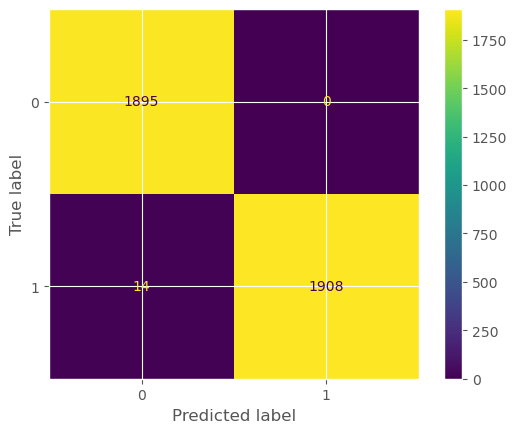

In [140]:
# insert [xgb_optuna_elastic Confusion Matrix]
conf_matrix_plot(xgb_optuna_elastic, X_val, y_val)

In [121]:
# Create a classification report
target_labels=['class', 'opinion']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

       class       0.99      1.00      1.00      1895
     opinion       1.00      0.99      1.00      1922

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Insights:** The confusion matrix and classification of the XGBoost_Optuna_ElasticNet mirrors that of the RandomForest_GridSearchCV. The identical confusion matrices and classification reports provide strong evidence that the classification task is exceptionally straightforward for both models. This perfect alignment, despite the fundamental differences between Random Forest and XGBoost algorithms, suggests that the features in the dataset are highly discriminative, leaving little room for model-specific nuances to affect the predictions.

This observation further reinforces the hypothesis that there might be underlying issues with the dataset, such as potential data leakage or unrealistically simple patterns. The fact that two different models, both with sophisticated tuning approaches, produce identical results down to the individual prediction level indicates that the dataset may not represent the true complexity of distinguishing between claims and opinions in real-world scenarios. 

This underscores the need for a critical re-examination of the feature set and data collection process to ensure the model's performance genuinely reflects the challenge of the task.

### **Use champion model to predict on test data**
For the purposes of task completion we can select the RandomForest_GridSearchCV as the champion model as it appears to require few computational resources since it completes its study on the validation set in 0.110018 seconds as compared with the XGBoost_Optuna_ElasticNet model which takes 0.384254 second to complete

In [141]:
y_pred = gcv_rf.best_estimator_.predict(X_test)

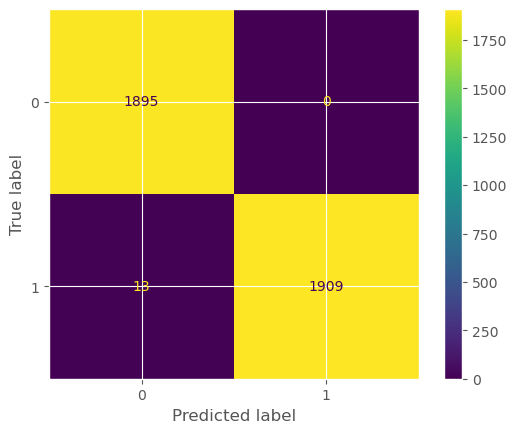

In [142]:
# insert [confusion matrix of RandomForest_GridSearchCV]
conf_matrix_plot(gcv_rf, X_test, y_test)

#### **Feature importances of champion model**


In [125]:
importances = gcv_rf.best_estimator_.feature_importances_
feature_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
print(feature_imp.sort_values('importance', ascending=False).head(10))

                          feature  importance
1                video_view_count    0.436019
2                video_like_count    0.307734
3               video_share_count    0.130183
4            video_download_count    0.085062
5             video_comment_count    0.034514
6                     text_length    0.003597
0              video_duration_sec    0.001589
8        author_ban_status_banned    0.000977
9  author_ban_status_under review    0.000300
7        verified_status_verified    0.000025


**Insights:** The video view count and video like count were the most important features to the RandomForest_GridSearchCV. This is not surprising given that there was significantly more separation between classes in the video_view_count and video_like_count data than there was in the video_download_count and video_comment_count. 

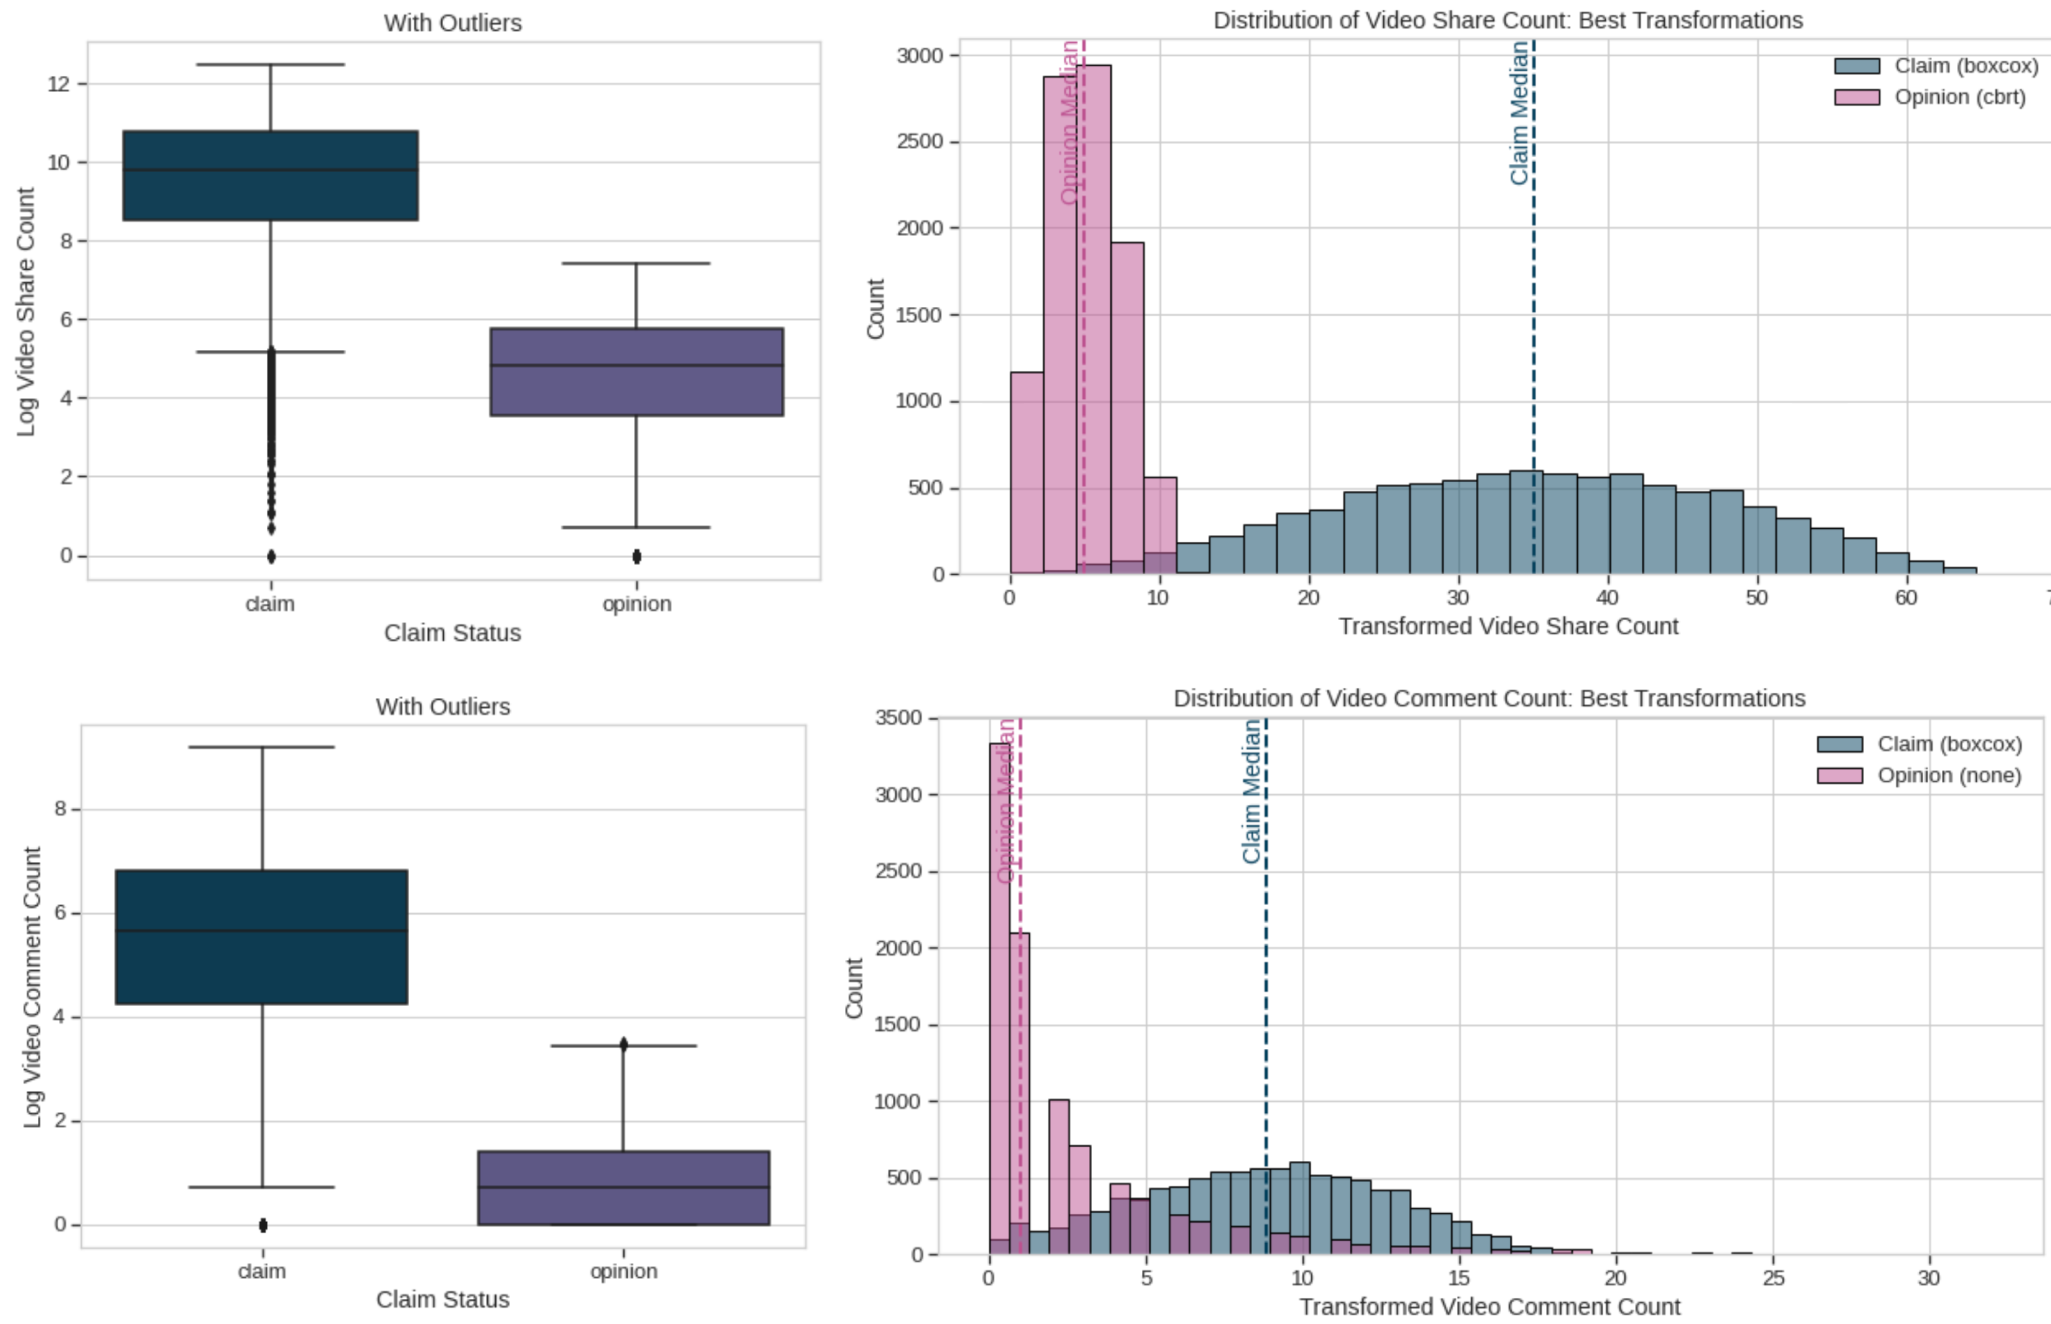

In [143]:
from IPython.display import Image

#display boxplots and histograms demonstrating relatively smaller differences in distribution amongs 
# claim and opinion video downloads and comments
Image(filename='Charts2.png', width=1200)

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

1) No, I would not consider this model for real world deployment. As indicated earlier, we should critically re-examine the feature set and data collection process to ensure the model's performance genuinely reflects the challenge of the task. The identical performance of different model architectures and >99% scores, strongly suggest that the classification task is artificially simple or that there may be data leakage. Using this model could lead to overconfidence in its predictions and can have ethical considerations (see **Additional Evaluation and Next Steps**)

2) The model was making nearly perfect predictions. They appear to be relying heavily on a few highly predictive features like view and like counts to disinguish between claims and opinions. The nuances of the algorithm might irrelevant as signals like the identical confusion matrices sugges that models are likely making predictions on simple threshods or patterns in these key features (see **Further investigating RandomForest_GridSearchCV & XGBoost_Optuna_ElasticNet model performance mirroring**).

3) Given the nearly perfect performance, feature engineering is unlikely to imporve the model's performance metrics. Creating features that capture more aspects of the video content, such as sentiment analysis, or temporal engagement patterns might make the model more robust and generalizable.

4) Rather than focusing on improving already high model performance, one might suggest investigating features that would make the model more realistic and reliable. These might include:
   - User interaction features such as ratio of likes or views over time
   - Content based features derived from NLP techniques on the video 
   - Temporal features that capture how engagement with the video changes over the 60 second time frame
<p></p>

But having looked at the raw data, it seems the goal should be to create a more challenging and realistic dataset  that represents the challenge of distinguishing claims from opinions in real world scenarios.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.